<a href="https://colab.research.google.com/github/CristinaPineda/projeto1-DataAnalysisHSMuCode/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Instruções do projeto

Na base de dados de infrações de trânsito, analise o mês de julho de 2020.
Para acessá-la, basta clicar no link em anexo.

### Perguntas que podem ser respondidas durante a análise:
* Qual é o total de infrações por tipo de infração (leve, média, grave, gravíssima)?
* Qual é o total de infrações por dia?
* A base de dados possui valores faltantes?

Suba o código utilizado na análise dos dados na conta do Github e compartilhe o link do projeto no campo ao lado para que outros desenvolvedores possam analisá-lo.

In [3]:
# importando pandas
import pandas as pd 
import numpy as np

In [4]:
# importando arquivo para análise
df = pd.read_csv('julho.csv', sep=';')
df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,MOTOCICLET,01/07/2020,00:02,"DF-003 (EPIA) KM 21,0 SENTIDO SUL ...",NaN,NaN,NaN,NaN,NaN,Média
1,7463-0,Transitar em velocidade superior à máxima perm...,Condutor,UTILITARIO,01/07/2020,00:04,DF-075(EPNB) KM 02 SENTIDO SAMAMBAIA ...,NaN,NaN,NaN,NaN,NaN,Grave
2,7463-0,Transitar em velocidade superior à máxima perm...,Condutor,CAMINHAO,01/07/2020,00:05,DF-025 (EPDB) KM 04 SENTIDO BALAO DO AEROPORTO...,NaN,NaN,NaN,NaN,NaN,Grave
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/07/2020,00:06,DF-075(EPNB) KM 02 SENTIDO SAMAMBAIA ...,NaN,NaN,NaN,NaN,NaN,Média
4,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,UTILITARIO,01/07/2020,00:07,"DF-075(EPNB),KM 3,6 SENTIDO DF-003(EPIA) ...",NaN,NaN,NaN,NaN,NaN,Média


In [5]:
df.describe()

,auinf_local_km
count,3508.000000
mean,29.354333
std,43.558542
min,0.000000
25%,6.000000
50%,16.000000
75%,69.000000
max,1977.000000


In [6]:
# tamanho do df
df.shape

(19500, 13)

In [7]:
# colunas do df
df.columns

Index(['tipo_infracao', 'descricao', 'tipo_infrator', 'tipo_veiculo',
       'cometimento', 'hora_cometimento', 'auinf_local_rodovia',
       'auinf_local_km', 'auinf_local_referencia', 'auinf_local_complemento',
       'auinf_local_latitude', 'auinf_local_longitude', 'grav_tipo'],
      dtype='object')

In [8]:
# tipos de dados
df.dtypes

tipo_infracao               object
descricao                   object
tipo_infrator               object
tipo_veiculo                object
cometimento                 object
hora_cometimento            object
auinf_local_rodovia         object
auinf_local_km             float64
auinf_local_referencia      object
auinf_local_complemento     object
auinf_local_latitude        object
auinf_local_longitude       object
grav_tipo                   object
dtype: object

In [9]:
# Qual é o total de infrações por tipo de infração (leve, média, grave, gravíssima)?
dfTipoInfracao = df.groupby("grav_tipo")["grav_tipo"].count()
dfTipoInfracao.dtypes
dfTipoInfracao

grav_tipo
Grave          2371
Gravíssima     1754
Leve           3257
Média         12118
Name: grav_tipo, dtype: int64

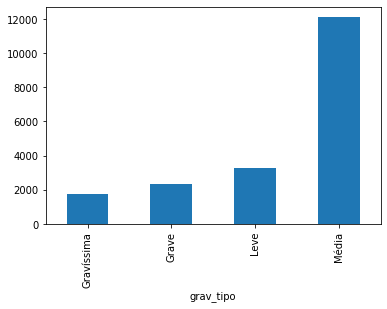

In [10]:
dfTipoInfracao.sort_values().plot(kind='bar')

In [11]:
# Total de infracoes por dia
dfInfracaoPorDia = df.groupby("cometimento")["cometimento"].count()
dfInfracaoPorDia

cometimento
01/07/2020    2807
02/07/2020    2849
03/07/2020    2943
04/07/2020    2111
05/07/2020    1812
06/07/2020    2376
07/07/2020    2601
08/07/2020    2001
Name: cometimento, dtype: int64

In [12]:
# Base possui valores faltantes
df.isnull().sum()

tipo_infracao                  0
descricao                      0
tipo_infrator                  0
tipo_veiculo                   0
cometimento                    0
hora_cometimento               0
auinf_local_rodovia            6
auinf_local_km             15992
auinf_local_referencia     16098
auinf_local_complemento    18810
auinf_local_latitude       16237
auinf_local_longitude      16237
grav_tipo                      0
dtype: int64

In [13]:
# excluir dasos faltantes

df.dropna(subset=["tipo_veiculo"], inplace=True)
df.dropna(subset=["auinf_local_rodovia"], inplace=True)
df.dropna(subset=["auinf_local_km"], inplace=True)
df.dropna(subset=["auinf_local_referencia"], inplace=True)
df.dropna(subset=["auinf_local_complemento"], inplace=True)
df.dropna(subset=["auinf_local_latitude"], inplace=True)
df.dropna(subset=["auinf_local_longitude"], inplace=True)

In [14]:
df.isnull().sum()

tipo_infracao              0
descricao                  0
tipo_infrator              0
tipo_veiculo               0
cometimento                0
hora_cometimento           0
auinf_local_rodovia        0
auinf_local_km             0
auinf_local_referencia     0
auinf_local_complemento    0
auinf_local_latitude       0
auinf_local_longitude      0
grav_tipo                  0
dtype: int64

# Projeto 2

## Elabore visualizações de dados sobre as infrações de trânsito no mês de julho de 2020. As visualizações podem ser, por exemplo:

* o total de infrações por tipo, com o eixo x representando o tipo e o eixo y o total;
* o total de infrações por tipo de infrator, como condutor e proprietário.

Suba o código criado para resolução da atividade na conta do Github e compartilhe o link do projeto no campo ao lado para que outros desenvolvedores possam analisá-lo.

In [15]:
# import do matplotlib para fazer os graficos
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Infracoes')

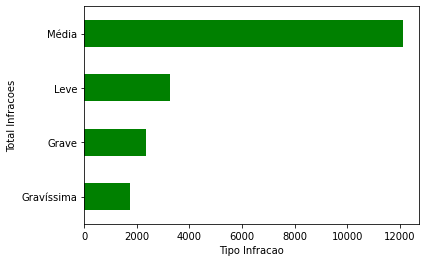

In [16]:
# o total de infrações por tipo, com o eixo x representando o tipo e o eixo y o total;
dfTipoInfracao.sort_values().plot(kind='barh', color='green')
plt.xlabel("Tipo Infracao")
plt.ylabel("Total Infracoes")

Text(0, 0.5, 'Tipo de Infrator')

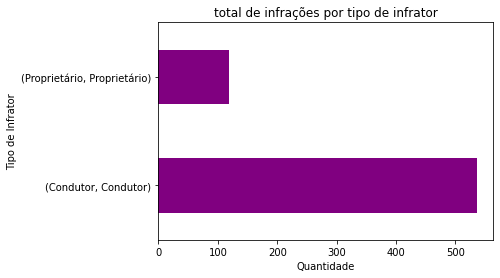

In [17]:
# o total de infrações por tipo de infrator, como condutor e proprietário.
dfPorTopoInfrator =  df.groupby("tipo_infrator")["tipo_infrator"].value_counts(ascending=False).plot.barh(title = "total de infrações por tipo de infrator", color="purple")
plt.xlabel("Quantidade")
plt.ylabel("Tipo de Infrator")

# Projeto 3

## Instruções do projeto
Utilizando a biblioteca Seaborn, crie visualizações de dados sobre as infrações de trânsito no mês de julho de 2020.

Suba o código criado para resolução da atividade na conta do Github e compartilhe o link do projeto no campo ao lado para que outros desenvolvedores possam analisá-lo.

In [33]:
df

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
7,6769-0,Conduzir veíc c/ defeito no sist de iluminação...,Proprietário,Caminhão Trator,01/07/2020,00:12,DF 003,0.0,Sentido Crescente,SC,-1.568.937.859,-4.784.911.996,Média
19,5010-0,Dirigir veículo sem possuir CNH/PPD/ACC,Condutor,Automóvel,01/07/2020,00:36,DF 130,1.0,Sentido Crescente,Sentido Crescente,-15.528.383.333.333.300,-47.622.524.999.999.900,Gravíssima
229,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,01/07/2020,06:52,DF 001,69.0,Sentido Crescente,km 69,-1.587.652.119,-48.048.626,Leve
231,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,01/07/2020,06:53,DF 001,69.0,Sentido Crescente,km 69,-1.587.652.036,-4.804.872.328,Leve
235,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,01/07/2020,06:54,DF 001,69.0,Sentido Crescente,km 69,-1.587.646.471,-4.804.880.437,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,5185-2,Deixar o passageiro de usar o cinto segurança,Condutor,Automóvel,08/07/2020,17:19,DF 003,14.0,Sentido Crescente,KM,-1.578.606.116,-4.794.169.066,Grave
19397,5185-2,Deixar o passageiro de usar o cinto segurança,Condutor,Automóvel,08/07/2020,17:20,DF 003,14.0,Sentido Crescente,KM,-1.578.605.336,-4.794.168.838,Grave
19399,5185-1,Deixar o condutor de usar o cinto segurança,Condutor,Automóvel,08/07/2020,17:20,DF 003,14.0,Sentido Crescente,KM,-1.578.593.576,-4.794.181.937,Grave
19409,5185-2,Deixar o passageiro de usar o cinto segurança,Condutor,Automóvel,08/07/2020,17:25,DF 003,14.0,Sentido Crescente,KM,-1.578.601.452,-4.794.172.188,Grave


In [22]:
import seaborn as sns

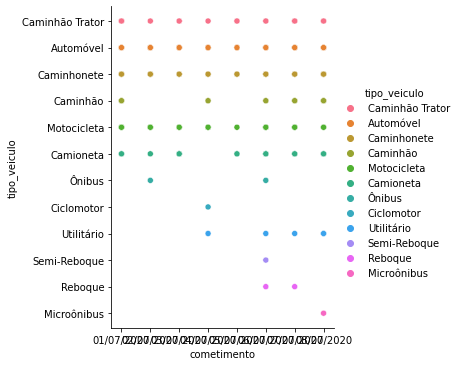

In [29]:
sns.relplot(x="cometimento", y="tipo_veiculo", hue="tipo_veiculo", data=df)

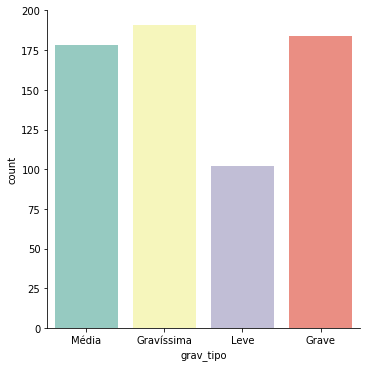

In [35]:
sns.catplot(x='grav_tipo', kind='count',palette='Set3', data = df)

In [37]:
import plotly.express as px

In [43]:
infracao = px.histogram(df, x='grav_tipo')
infracao.show()

In [46]:
colors = px.colors.qualitative.swatches()
colors.show()
